In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

def format_anno_file(file_path):
    anno_df = pd.read_csv(file_path, sep='	')
    anno_df.columns.values[0] = 'PeakID'
    anno_df = anno_df[anno_df['Annotation'].notna() & (anno_df['Annotation'].str.strip() != '')]
    anno_df['anno_type'] = anno_df['Annotation'].apply(lambda x: x.split(' (')[0])
    anno_df['anno_type'] = anno_df['anno_type'].apply(lambda x: x.title() if x != 'TTS' else x)
    anno_df['anno_type'] = anno_df['anno_type'].apply(lambda x: 'Promoter' if x == 'Promoter-Tss' else x)
    return anno_df

files_obj = []
df_stats = pd.DataFrame()

for root, folders, files in os.walk('/home/leizheng/workspace/pipeline/PARIS2/project/mirna/ago_05062025/results/03_peak/03_annotation'):
    for file in files:
        if '.annotatePeaks.txt' in file:
            file_path = os.path.join(root, file)
            print(file)
            anno_df = format_anno_file(file_path)
            subloc = file.split('/')[-1].split('_')[-3]
            replicates = file.split('/')[-1].split('_')[-2]
            miRNA = file.split('/')[-1].split('_')[-1].split('.')[0]
            print(subloc, replicates, miRNA)

            files_obj.append({
                'subloc': subloc,
                'replicates': replicates,
                'miRNA': miRNA,
                'Intron': anno_df[anno_df['anno_type']=="Intron"].shape[0],
                'Exon': anno_df[anno_df['anno_type']=="Exon"].shape[0],
                'Promoter': anno_df[anno_df['anno_type']=="Promoter"].shape[0],
                '3 UTR': anno_df[anno_df['anno_type']=="3 UTR"].shape[0],
                '5 UTR': anno_df[anno_df['anno_type']=="5 UTR"].shape[0],
                'Start Codon': anno_df[anno_df['anno_type']=="Start Codon"].shape[0],
                'TTS': anno_df[anno_df['anno_type']=="TTS"].shape[0],
                'Stop Codon': anno_df[anno_df['anno_type']=="Stop Codon"].shape[0]
            })
            # subloc = file_path.split('/')[-1].split('_')[-4]
            # replicates = file_path.split('/')[-1].split('_')[-3]
            # miRNA = file_path.split('/')[-1].split('_')[-2].split('.')[0]
            # print(subloc, replicates, miRNA)
            # try:
            #     file_df = pd.read_csv(file_path, sep='\t', header=None)
            # except pd.errors.EmptyDataError:
            #     file_df = pd.DataFrame() 
            # files_obj.append({
            #     'subloc': subloc,
            #     'replicates': replicates,
            #     'miRNA': miRNA,
            #     'file_path': file_path,
            #     # 'dataframe': file_df,
            #     'rows': file_df.shape[0],
            # })

Pool_Chromatin_1_miR-3529-3p.annotatePeaks.txt
Chromatin 1 miR-3529-3p
Pool_Chromatin_1_miR-26a-5p.annotatePeaks.txt
Chromatin 1 miR-26a-5p
Pool_Chromatin_1_miR-100-5p.annotatePeaks.txt
Chromatin 1 miR-100-5p
Pool_Chromatin_1_miR-19a-3p.annotatePeaks.txt
Chromatin 1 miR-19a-3p
Pool_Chromatin_2_miR-29a-3p.annotatePeaks.txt
Chromatin 2 miR-29a-3p
Pool_Chromatin_2_miR-100-5p.annotatePeaks.txt
Chromatin 2 miR-100-5p
Pool_Chromatin_2_miR-19a-3p.annotatePeaks.txt
Chromatin 2 miR-19a-3p
Pool_Chromatin_2_miR-31-5p.annotatePeaks.txt
Chromatin 2 miR-31-5p
Pool_Chromatin_1_miR-96-5p.annotatePeaks.txt
Chromatin 1 miR-96-5p
Pool_Chromatin_2_miR-29b-3p.annotatePeaks.txt
Chromatin 2 miR-29b-3p
Pool_Chromatin_1_miR-30b-5p.annotatePeaks.txt
Chromatin 1 miR-30b-5p
Pool_Chromatin_2_miR-125b-5p.annotatePeaks.txt
Chromatin 2 miR-125b-5p
Pool_Chromatin_1_miR-31-5p.annotatePeaks.txt
Chromatin 1 miR-31-5p
Pool_Chromatin_2_miR-3529-3p.annotatePeaks.txt
Chromatin 2 miR-3529-3p
Pool_Chromatin_1_miR-125b-5p.annot

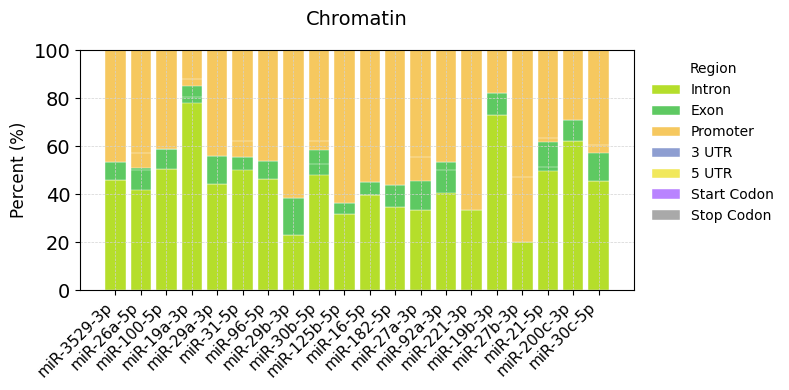

In [18]:

df = pd.DataFrame(files_obj)
# 感兴趣的区域列
regions = ["Intron", "Exon", "Promoter", "3 UTR", "5 UTR", "Start Codon", "Stop Codon"]

# 配色映射
region_colors = {
    "Exon": "#5EC962",
    "Intron": "#B5DE2B",
    "Promoter": "#F6C85F",
    "TTS": "#8E9ED1",
    "3 UTR": "#8E9ED1",
    "5 UTR": "#F1E85C",
    "Start Codon": "#B983FF",
    "Stop Codon": "#A9A9A9"
}

# 计算百分比
df["total"] = df[regions].sum(axis=1)
for r in regions:
    df[r] = df[r] / df["total"] * 100

# 分图绘制
sublocs = df["subloc"].unique()
ncols = 1
nrows = len(sublocs)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4 * nrows), squeeze=False)

for i, subloc in enumerate(sublocs):
    ax = axs[i, 0]
    sub_df = df[df["subloc"] == subloc].copy()
    pivot_df = sub_df.set_index("miRNA")[regions]

    bottom = pd.Series([0]*len(pivot_df), index=pivot_df.index)
    for r in regions:
        ax.bar(pivot_df.index, pivot_df[r], bottom=bottom, label=r,
               color=region_colors.get(r, "#CCCCCC"), edgecolor='white', linewidth=0.3)
        bottom += pivot_df[r]

    ax.set_ylabel("Percent (%)")
    ax.set_title(f"{subloc}", fontsize=14)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)
plt.setp(ax.get_xticklabels(), ha='right', fontsize=11)
plt.tight_layout()
plt.show()
# 保存图像
# fig.savefig('results/figures/miRNA_region_percent.pdf', bbox_inches='tight')

In [ ]:

df = pd.DataFrame(files_obj)

# 绘制条形图
plt.figure(figsize=(10, 6))
# _plot_df = df[df['replicates'] == 'REP1']
_plot_df = df.sort_values(by='rows', ascending=False)
sns.barplot(data=_plot_df, x='miRNA', y='rows', hue='subloc', palette='Set2', edgecolor='black', errwidth=0)

# 设置 x 轴标签旋转 45 度
plt.xticks(rotation=45, ha='right')

# 设置 y 轴标签
plt.ylabel('Number of target')

# 在每个 bar 顶部标注数值
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)  # 显示整数

plt.legend(title='', bbox_to_anchor=(0.5, 1), loc='upper center', fontsize=10, ncol=2)

# 显示图表
plt.tight_layout()
plt.savefig('miRNA_target_number.pdf', bbox_inches='tight')
plt.savefig('miRNA_target_number.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_118411/1436749653.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=_plot_df, x='miRNA', y='rows', hue='subloc', palette='Set2', edgecolor='black', errwidth=0)


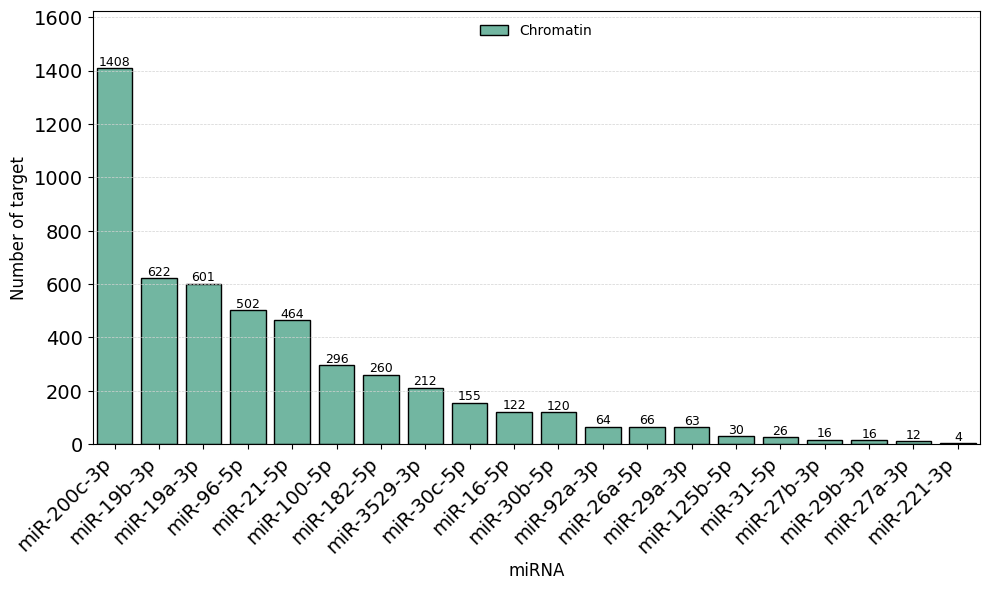